<a href="https://colab.research.google.com/github/haneeth25/Super_Image_Resolution_Using_Cnn/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import os 
import cv2

In [3]:
import numpy as np
import PIL
from PIL import Image
DirPath_lr_data = '/content/drive/MyDrive/SR MODEL/low_res'
DirPath_hr_data = '/content/drive/MyDrive/SR MODEL/high_res'
img_names = os.listdir(DirPath_lr_data)
train__lr = []
train__hr= []

for each_img in img_names:
  if each_img != '.DS_Store':
    img_path = os.path.join(DirPath_lr_data,each_img)
    img = PIL.Image.open(img_path)
    img_arr = np.array(img) 
    train__lr.append(img_arr)

for each_img in img_names:
  if each_img != '.DS_Store':
    img_path = os.path.join(DirPath_hr_data,each_img)
    img = PIL.Image.open(img_path)
    img_arr = np.array(img) 
    train__hr.append(img_arr)

In [4]:
print(len(train__lr) , len(train__hr))

203 203


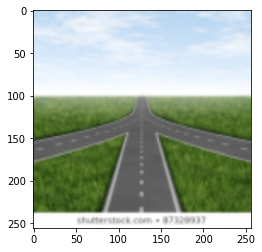

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train__lr[0])
plt.show()

In [6]:
print(train__lr[0])

[[[186 216 242 255]
  [186 216 242 255]
  [186 216 242 255]
  ...
  [195 220 242 255]
  [195 220 242 255]
  [195 220 242 255]]

 [[186 216 242 255]
  [186 216 242 255]
  [186 216 242 255]
  ...
  [195 220 242 255]
  [195 220 242 255]
  [195 220 242 255]]

 [[188 216 242 255]
  [188 216 242 255]
  [188 216 242 255]
  ...
  [197 220 241 255]
  [196 220 241 255]
  [196 220 241 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


In [7]:
train__lr[0].shape

(256, 256, 4)

In [8]:
type(train__lr)

list

In [9]:
train__lr = np.array(train__lr)
train__lr = train__lr/255.
train__lr[0]

array([[[0.72941176, 0.84705882, 0.94901961, 1.        ],
        [0.72941176, 0.84705882, 0.94901961, 1.        ],
        [0.72941176, 0.84705882, 0.94901961, 1.        ],
        ...,
        [0.76470588, 0.8627451 , 0.94901961, 1.        ],
        [0.76470588, 0.8627451 , 0.94901961, 1.        ],
        [0.76470588, 0.8627451 , 0.94901961, 1.        ]],

       [[0.72941176, 0.84705882, 0.94901961, 1.        ],
        [0.72941176, 0.84705882, 0.94901961, 1.        ],
        [0.72941176, 0.84705882, 0.94901961, 1.        ],
        ...,
        [0.76470588, 0.8627451 , 0.94901961, 1.        ],
        [0.76470588, 0.8627451 , 0.94901961, 1.        ],
        [0.76470588, 0.8627451 , 0.94901961, 1.        ]],

       [[0.7372549 , 0.84705882, 0.94901961, 1.        ],
        [0.7372549 , 0.84705882, 0.94901961, 1.        ],
        [0.7372549 , 0.84705882, 0.94901961, 1.        ],
        ...,
        [0.77254902, 0.8627451 , 0.94509804, 1.        ],
        [0.76862745, 0.862745

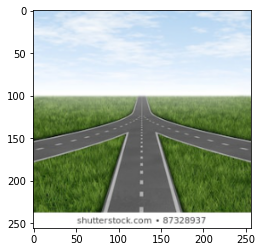

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train__hr[0])
plt.show()
     

In [11]:
train__hr = np.array(train__hr)
train__hr = train__hr/255.
train__hr[0]

array([[[0.7254902 , 0.84705882, 0.94901961, 1.        ],
        [0.7254902 , 0.84705882, 0.94901961, 1.        ],
        [0.7254902 , 0.84705882, 0.94901961, 1.        ],
        ...,
        [0.76470588, 0.86666667, 0.95686275, 1.        ],
        [0.76078431, 0.8627451 , 0.95686275, 1.        ],
        [0.75686275, 0.8627451 , 0.95686275, 1.        ]],

       [[0.72941176, 0.84705882, 0.94901961, 1.        ],
        [0.72941176, 0.84705882, 0.94901961, 1.        ],
        [0.72941176, 0.84705882, 0.94901961, 1.        ],
        ...,
        [0.75686275, 0.85490196, 0.94117647, 1.        ],
        [0.76862745, 0.85882353, 0.95294118, 1.        ],
        [0.76470588, 0.86666667, 0.95294118, 1.        ]],

       [[0.74117647, 0.84705882, 0.95294118, 1.        ],
        [0.74117647, 0.84705882, 0.95294118, 1.        ],
        [0.74117647, 0.84705882, 0.95294118, 1.        ],
        ...,
        [0.77647059, 0.8627451 , 0.94509804, 1.        ],
        [0.77647059, 0.862745

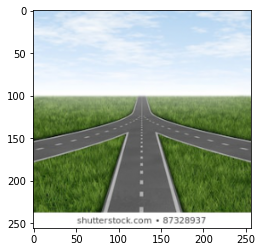

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train__hr[0])
plt.show()     

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout,UpSampling2D,Add
from tensorflow.keras import regularizers
from keras.optimizers import Adam 
from keras.models import Model

In [14]:
def Super_Resolution():
    input_img = Input(shape=train__lr.shape[1:])
    
    l1 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(input_img)
    l1 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l1)
    m1 = MaxPooling2D(pool_size=2)(l1)

    l2 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(m1)
    l2 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l2)
    m2 = MaxPooling2D(pool_size=2)(l2)
    
    l3 = Conv2D(256,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(m2)
    
    u1 = UpSampling2D(size=2)(l3)
    l4 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(u1)
    l4 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l4)
    add1 = Add()([l4,l2])

    u2 = UpSampling2D(size=2)(add1)
    l5 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(u2)
    l5 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l5)
    add2 = Add()([l5,l1])

    output = Conv2D(4,kernel_size=4,activation="linear",padding="same",activity_regularizer=regularizers.l1(10e-10))(add2)
    
    model = Model(input_img,output)
    return model

model2 = Super_Resolution()
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  4160        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  65600       ['conv2d[0][0]']                 
                                )                                                             

In [15]:
model2.compile(loss="mean_squared_error",optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [16]:
model2.fit(train__lr,train__hr,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 43s 2s/step - loss: 0.4071 - accuracy: 0.3151
Epoch 2/100
7/7 [==============================] - 12s 2s/step - loss: 0.0746 - accuracy: 0.9487
Epoch 3/100
7/7 [==============================] - 12s 2s/step - loss: 0.0326 - accuracy: 0.9552
Epoch 4/100
7/7 [==============================] - 12s 2s/step - loss: 0.0204 - accuracy: 0.9566
Epoch 5/100
7/7 [==============================] - 12s 2s/step - loss: 0.0143 - accuracy: 0.9527
Epoch 6/100
7/7 [==============================] - 12s 2s/step - loss: 0.0113 - accuracy: 0.9342
Epoch 7/100
7/7 [==============================] - 12s 2s/step - loss: 0.0087 - accuracy: 0.9528
Epoch 8/100
7/7 [==============================] - 12s 2s/step - loss: 0.0072 - accuracy: 0.9453
Epoch 9/100
7/7 [==============================] - 12s 2s/step - loss: 0.0066 - accuracy: 0.9387
Epoch 10/100
7/7 [==============================] - 12s 2s/step - loss: 0.0054 - accuracy: 0.9617
Epoch 11/100
7/7 [===========

In [17]:
img = PIL.Image.open('/content/442.png')
img_arr = np.array(img) 

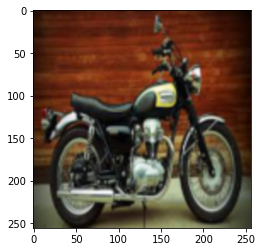

In [18]:
input_to_model = np.array([img_arr])
plt.imshow(input_to_model[0])
plt.show()     

In [19]:
test_img = img_arr/255.
input_to_model = np.array([test_img])
input_to_model.shape

(1, 256, 256, 4)

In [20]:
hr_output = model2.predict(input_to_model)

1/1 [==============================] - 1s 629ms/step


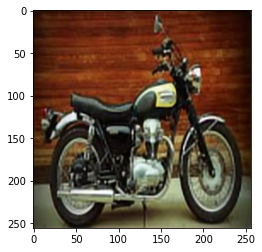

In [21]:
arr = np.squeeze(hr_output) # you can give axis attribute if you wanna squeeze in specific dimension
plt.imshow(arr)
plt.show()

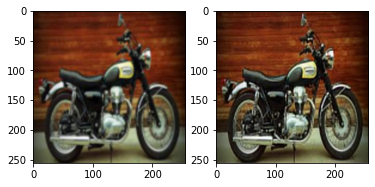

In [22]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(input_to_model[0])
f.add_subplot(1,2, 2)
plt.imshow(arr)
plt.show()

In [ ]:
model2.save('srcnn.h5')

In [23]:
img_arr

array([[[ 35,  17,  11, 255],
        [ 35,  17,  11, 255],
        [ 35,  17,  10, 255],
        ...,
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255]],

       [[ 35,  17,  11, 255],
        [ 35,  17,  11, 255],
        [ 35,  17,  10, 255],
        ...,
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255]],

       [[ 34,  16,   9, 255],
        [ 34,  16,   9, 255],
        [ 35,  16,   9, 255],
        ...,
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255]],

       ...,

       [[ 59,  61,  47, 255],
        [ 59,  61,  47, 255],
        [ 60,  62,  48, 255],
        ...,
        [ 58,  60,  46, 255],
        [ 56,  58,  44, 255],
        [ 56,  58,  44, 255]],

       [[ 59,  61,  47, 255],
        [ 59,  61,  47, 255],
        [ 60,  62,  48, 255],
        ...,
        [ 57,  59,  45, 255],
        [ 56,  58,  44, 255],
        [ 56,  58,  44, 255]],

       [[ 59

In [24]:
input_to_model[0]

array([[[0.1372549 , 0.06666667, 0.04313725, 1.        ],
        [0.1372549 , 0.06666667, 0.04313725, 1.        ],
        [0.1372549 , 0.06666667, 0.03921569, 1.        ],
        ...,
        [0.05098039, 0.01960784, 0.00784314, 1.        ],
        [0.05098039, 0.01960784, 0.00784314, 1.        ],
        [0.05098039, 0.01960784, 0.00784314, 1.        ]],

       [[0.1372549 , 0.06666667, 0.04313725, 1.        ],
        [0.1372549 , 0.06666667, 0.04313725, 1.        ],
        [0.1372549 , 0.06666667, 0.03921569, 1.        ],
        ...,
        [0.05098039, 0.01960784, 0.00784314, 1.        ],
        [0.05098039, 0.01960784, 0.00784314, 1.        ],
        [0.05098039, 0.01960784, 0.00784314, 1.        ]],

       [[0.13333333, 0.0627451 , 0.03529412, 1.        ],
        [0.13333333, 0.0627451 , 0.03529412, 1.        ],
        [0.1372549 , 0.0627451 , 0.03529412, 1.        ],
        ...,
        [0.05098039, 0.01960784, 0.00784314, 1.        ],
        [0.05098039, 0.019607

In [25]:
hr_output

array([[[[ 0.1004575 ,  0.04630072,  0.01461056,  0.8245103 ],
         [ 0.09641381,  0.10895833,  0.01896069,  0.82849246],
         [ 0.10710584,  0.08159409,  0.03149008,  0.88880724],
         ...,
         [ 0.13333827,  0.07678843,  0.08270735,  0.9066736 ],
         [ 0.10247333,  0.13294747,  0.09698354,  0.8809741 ],
         [ 0.17035478,  0.1515995 ,  0.09403302,  0.721582  ]],

        [[ 0.12062871,  0.00525416,  0.00795778,  0.87777215],
         [ 0.15208264,  0.05488756,  0.02777004,  0.92222214],
         [ 0.12770419,  0.0359509 ,  0.02227468,  0.9487494 ],
         ...,
         [ 0.03399462, -0.02175703, -0.06270041,  1.0147371 ],
         [ 0.01156424,  0.00505676, -0.01339781,  1.0044178 ],
         [ 0.09038296,  0.09078884,  0.06678252,  0.981388  ]],

        [[ 0.17016517,  0.03935244,  0.04250181,  0.9671151 ],
         [ 0.16022104,  0.0276782 , -0.00479202,  0.9913593 ],
         [ 0.13915174,  0.01765847,  0.01522242,  1.012943  ],
         ...,
         

In [26]:
hr_output*255

array([[[[ 25.616661 ,  11.806684 ,   3.725693 , 210.25012  ],
         [ 24.58552  ,  27.784372 ,   4.8349757, 211.26558  ],
         [ 27.31199  ,  20.806492 ,   8.02997  , 226.64584  ],
         ...,
         [ 34.00126  ,  19.581049 ,  21.090376 , 231.20177  ],
         [ 26.1307   ,  33.901608 ,  24.730804 , 224.64839  ],
         [ 43.44047  ,  38.65787  ,  23.97842  , 184.0034   ]],

        [[ 30.76032  ,   1.3398111,   2.0292346, 223.8319   ],
         [ 38.78107  ,  13.996326 ,   7.0813613, 235.16664  ],
         [ 32.564568 ,   9.167479 ,   5.6800427, 241.9311   ],
         ...,
         [  8.668629 ,  -5.5480433, -15.9886055, 258.75797  ],
         [  2.9488807,   1.2894734,  -3.4164424, 256.12653  ],
         [ 23.047653 ,  23.151154 ,  17.029543 , 250.25394  ]],

        [[ 43.392117 ,  10.034872 ,  10.837963 , 246.61435  ],
         [ 40.856365 ,   7.05794  ,  -1.2219651, 252.79662  ],
         [ 35.483692 ,   4.5029106,   3.8817172, 258.30048  ],
         ...,
         

In [28]:
img_orginal = PIL.Image.open('/content/442_high.png')
img_orginal_arr = np.array(img_orginal) 

In [29]:
img_orginal_arr

array([[[ 35,  17,  13, 255],
        [ 35,  17,  12, 255],
        [ 35,  18,  11, 255],
        ...,
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255]],

       [[ 35,  17,  11, 255],
        [ 35,  17,  11, 255],
        [ 35,  17,  10, 255],
        ...,
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255]],

       [[ 34,  16,   9, 255],
        [ 34,  15,   9, 255],
        [ 35,  15,   9, 255],
        ...,
        [ 14,   6,   3, 255],
        [ 13,   5,   2, 255],
        [ 13,   5,   2, 255]],

       ...,

       [[ 59,  60,  47, 255],
        [ 59,  61,  47, 255],
        [ 60,  62,  48, 255],
        ...,
        [ 58,  60,  46, 255],
        [ 56,  58,  44, 255],
        [ 56,  58,  44, 255]],

       [[ 59,  60,  47, 255],
        [ 59,  61,  47, 255],
        [ 60,  62,  48, 255],
        ...,
        [ 57,  59,  45, 255],
        [ 56,  58,  44, 255],
        [ 55,  57,  43, 255]],

       [[ 59

In [30]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 1.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [31]:
v1 = PSNR(img_orginal_arr/255.,img_arr/255.)
v1

27.258380115150263

In [32]:
v2 = PSNR(img_orginal_arr/255.,hr_output)
v2

29.503820024639246